In [ ]:
#A machine learning model using various algorithms to predict the class information for
#pimaindiansdiabetes dataset.

In [25]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from sklearn import metrics
from pandas import Series as s
from pandas import DataFrame as f
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



In [ ]:
# import data from your folder

In [5]:
data = pd.read_csv(r"C:\\Users\\HP\downloads\diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [7]:
# check if any null value is present
data.isnull().values.any()

False

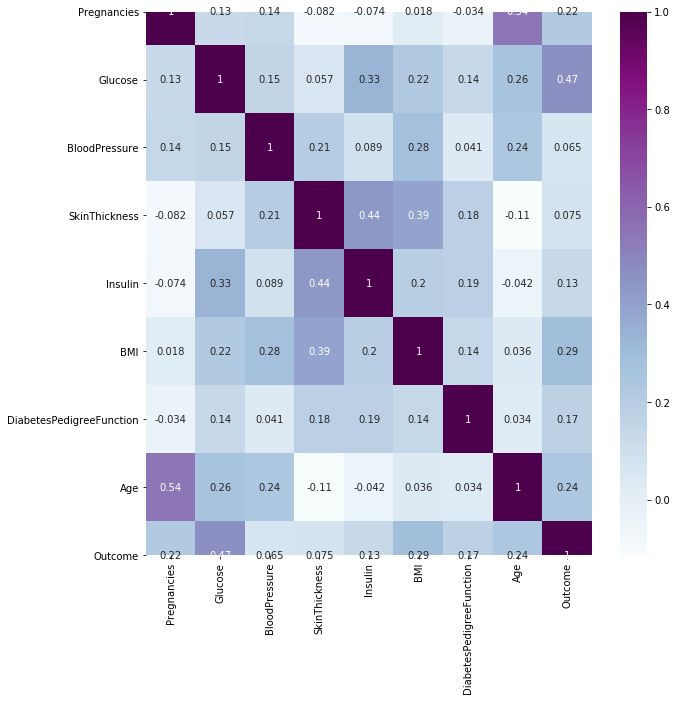

In [36]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="BuPu")

In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# giving labels and features

In [8]:
y = data.Outcome
X = data.drop('Outcome', axis=1)

In [6]:
print("Label 'y':")
print(y)
print("Feature 'X':")
print(X)

Label 'y':
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
Feature 'X':
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1      

In [ ]:
# using kNN classifier
# instantiate the model using n_neighbors in range (1,100)

In [7]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
# STEP 1: split X and y into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# print the shapes of the new X objects

In [9]:
print("\nX_train:\n")
print(X_train.shape)
print("\nX_test:\n")
print(X_test.shape)



X_train:

(614, 8)

X_test:

(154, 8)


In [ ]:
# print the shapes of the new y objects

In [10]:
print("\ny_train:\n")
print(y_train.shape)
print("\ny_test:\n")
print(y_test.shape)


y_train:

(614,)

y_test:

(154,)


In [46]:
X_train.iloc[:,:8].head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
301,2,144,58,33,135,31.6,0.422,25
78,0,131,0,0,0,43.2,0.270,26
683,4,125,80,0,0,32.3,0.536,27
564,0,91,80,0,0,32.4,0.601,27
639,1,100,74,12,46,19.5,0.149,28
180,6,87,80,0,0,23.2,0.084,32
513,2,91,62,0,0,27.3,0.525,22
81,2,74,0,0,0,0.0,0.102,22
615,3,106,72,0,0,25.8,0.207,27
223,7,142,60,33,190,28.8,0.687,61


In [47]:
train_features=X_train.iloc[:,:8]
train_target=X_train["DiabetesPedigreeFunction"]

In [44]:
train_features.shape

(614, 8)

In [48]:
train_target.shape

(614,)

In [ ]:
# STEP 2: train the model on the training set

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# STEP 3: make predictions on the testing set

In [12]:
p=knn.predict(X_test)

In [ ]:
# print the predictions

In [13]:
print("Predictions:")
print(p)

Predictions:
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1]


In [ ]:
# print y (actual response values)

In [14]:
print("Actual response values: ")
print(y)

Actual response values: 
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
# print confusion matrix to compare actual response values with predicted response values

In [15]:
print("Comparison with Confusion Matrix:")
print(confusion_matrix(y_test,p))

Comparison with Confusion Matrix:
[[87 15]
 [30 22]]


In [ ]:
# compute classification accuracy for the kNN model

In [16]:
print("Accuracy: ")
print(accuracy_score(y_test,p))

Accuracy: 
0.7077922077922078


In [ ]:
#Prediction for an out of sample observation

In [17]:
print("Predicition for an out of sample observation:")
print(knn.predict([[2,197,70,45,543,30.5,0.158,53]]))

Predicition for an out of sample observation:
[1]


In [ ]:
Logistic Regression

In [29]:
lr=LogisticRegression()

In [54]:
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
lr.score(X_train,y_train)

0.7899022801302932

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
#KNN Algorithm

In [26]:
p=knn.predict(X_test)
print("knn test set confusionmatrix:",confusion_matrix(y_test,p))
print("knn train set accuracy:",metrics.accuracy_score(y_train,knn.predict(X_train)))
print("knn test set accuracy:",metrics.accuracy_score(y_test,p))

knn test set confusionmatrix: [[92 11]
 [31 20]]
knn train set accuracy: 0.8061889250814332
knn test set accuracy: 0.7272727272727273


In [ ]:
#Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=2).fit(X_train,y_train)
r=ran.predict(X_test)
print("Random forest Train set Accuracy: ", metrics.accuracy_score(y_train, ran.predict(X_train)))
print("random forest Test set Accuracy: ", metrics.accuracy_score(y_test, r))

Random forest Train set Accuracy:  1.0
random forest Test set Accuracy:  0.7597402597402597


In [ ]:
#Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
tree.fit(X_train,y_train)
t=tree.predict(X_test)
tacc=accuracy_score(y_test,t)
print('decision tree accuracy: ',tacc)
print('decision tree confusion matrix: ',confusion_matrix(y_test,t))


decision tree accuracy:  0.7077922077922078
decision tree confusion matrix:  [[87 16]
 [29 22]]


In [ ]:
#Here we get more accurate result for logistic regression 